In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [18]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [19]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("KEY")
alpaca_secret_key = os.getenv("SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Getting Past 3 Year's Worth of Nvidia, BYD Auto, and Big 5 Sporting Goods Stock Price Data via Alpaca API Call

In [20]:
# Set the ticker
ticker = ["NVDA","BYD", "BGFV"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 3 years from Today
start_date = pd.Timestamp("2019-05-25", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-26", tz="America/New_York").isoformat()

# Get  years worth of historical data for NVDA, BYD, BGFV
ticker_data = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df


ticker_data.head()

BGFV                                  BYD         \
                            open  high     low   close  volume   open   high   
time                                                                           
2019-05-28 00:00:00-04:00  2.390  2.52  2.3500  2.3600  314854  25.97  26.18   
2019-05-29 00:00:00-04:00  2.370  2.38  2.1365  2.1839  452810  25.22  25.69   
2019-05-30 00:00:00-04:00  2.150  2.19  2.0600  2.0750  349245  25.24  25.45   
2019-05-31 00:00:00-04:00  2.005  2.02  2.0000  2.0000   12923  23.70  24.36   
2019-06-03 00:00:00-04:00  2.020  2.19  2.0100  2.0700  263623  23.84  23.98   

                                                      NVDA                    \
                              low   close   volume    open      high     low   
time                                                                           
2019-05-28 00:00:00-04:00  25.475  25.490   555704  145.86  147.1800  143.25   
2019-05-29 00:00:00-04:00  24.950  25.080  1274203  141.41  142.8200  138.94   
2019-05-30 00:00:00-04:00  24.070  24.250  1574357  140.31  141.7499  137.57   
2019-05-31 00:00:00-04:00  23.650  23.925  1747455  137.14  139.8548  135.39   
2019-06-03 00:00:00-04:00  22.750  22.960  2443415  135.91  137.4700  132.60   

                                             
                            close    volume  
time                                         
2019-05-28 00:00:00-04:00  143.30   9185563  
2019-05-29 00:00:00-04:00  140.31  13056864  
2019-05-30 00:00:00-04:00  139.11   9231333  
2019-05-31 00:00:00-04:00  135.46   8923463  
2019-06-03 00:00:00-04:00  133.78  10726924

# Stocks Closing Price 

In [42]:
jason_portfolio_prices = pd.DataFrame()
jason_portfolio_prices['NVDA'] = ticker_data['NVDA']['close']
jason_portfolio_prices['BYD'] = ticker_data['BYD']['close']
jason_portfolio_prices['BGFV'] = ticker_data['BGFV']['close']
jason_portfolio_prices.index = ticker_data.index.date
jason_portfolio_prices.head(10)

,NVDA,BYD,BGFV
2019-05-28,143.30,25.490,2.3600
2019-05-29,140.31,25.080,2.1839
2019-05-30,139.11,24.250,2.0750
2019-05-31,135.46,23.925,2.0000
2019-06-03,133.78,22.960,2.0700
2019-06-04,143.02,24.040,2.2200
2019-06-05,141.33,23.830,2.0400
2019-06-06,143.79,24.180,2.0800
2019-06-07,145.50,25.070,2.0800
2019-06-10,148.45,25.650,2.1200


In [43]:
jason_portfolio_prices.to_csv("jason_portfolio.csv")

### Simulate five year portfolio growth using Monte Carlo simulation

In [21]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_Stocks= MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252*3
)
MC_Stocks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.016610,0.982959,1.043112,0.979840,1.035468,0.997071,0.997084,1.012358,1.005416,1.003370,...,1.003767,0.939502,1.077460,1.028273,0.979599,0.988784,1.010583,0.948835,0.991416,1.018893
2,1.034099,1.000171,1.022266,0.970173,0.989941,0.974418,1.030119,1.017207,0.984220,0.987334,...,1.008019,0.959570,1.084428,1.045076,0.966377,0.963006,1.011867,0.952414,0.977878,0.961250
3,1.024841,1.008830,0.964648,0.964971,0.980276,0.984470,1.024849,1.028564,0.980419,0.974423,...,1.056279,0.963978,1.113144,1.050942,0.976799,1.006303,1.035077,0.948361,0.937760,0.952910
4,1.084992,1.020045,0.987672,0.912877,0.958315,1.038567,1.010168,1.066080,1.040000,0.895690,...,1.028899,0.995463,1.049010,1.097798,0.969563,0.945602,1.104312,0.921327,0.934889,0.935599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,33.742615,62.659236,59.510734,14.933114,79.750289,45.137477,57.249520,40.717298,6.727193,93.135365,...,15.395999,17.321908,15.609502,77.575450,20.384011,5.845781,94.579367,25.791748,52.608942,38.018068
753,35.129051,62.290892,62.527637,14.310961,76.497955,47.422734,58.309775,39.376826,6.921486,93.864756,...,15.530129,17.453621,15.543082,77.282118,21.412598,5.727111,97.511445,25.436170,52.411926,38.089195
754,35.726455,62.778564,60.576312,14.093821,77.975495,46.567737,59.385650,38.702813,6.985929,90.106155,...,15.567474,17.176542,14.572848,77.562545,21.116858,5.646299,93.792521,26.263010,53.750528,39.005645
755,36.677681,64.585409,64.967061,14.350083,79.270344,46.954306,56.766086,38.478730,6.797038,93.202436,...,15.315598,16.704445,14.661902,80.696321,20.144602,5.770198,90.711993,27.112866,53.785945,36.946891


In [24]:
 #Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_Stocks.simulated_return.mean(axis=1)),
    "median": list(MC_Stocks.simulated_return.median(axis=1)),
    "min": list(MC_Stocks.simulated_return.min(axis=1)),
    "max": list(MC_Stocks.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.004734,1.005292,0.906958,1.097107
2,1.009196,1.009486,0.867162,1.172118
3,1.013892,1.013148,0.863573,1.206462
4,1.019137,1.020111,0.837485,1.235393


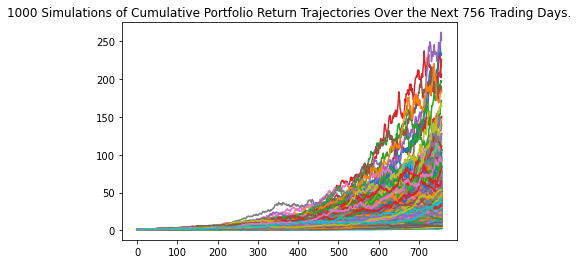

In [25]:
# Plot simulation outcomes
line_plot = MC_Stocks.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_Stocks_sim_plot.png", bbox_inches="tight")

In [26]:
MC_Stocks.summarize_cumulative_return()

count           1000.000000
mean              33.691302
std               30.220525
min                2.291563
25%               13.789101
50%               25.238901
75%               44.395224
max              251.280259
95% CI Lower       4.534572
95% CI Upper     110.267650
Name: 756, dtype: float64

In [55]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10042.560301,10037.687551,9117.597826,11078.501181
2,10083.308641,10058.676770,8862.703868,11745.638525
3,10114.906946,10092.634600,8591.976452,12012.404691
4,10160.287211,10149.812136,8070.671503,12439.073564


## Pick closing prices and compute the daily returns

In [30]:


data_dict = {"NVDA":ticker_data["NVDA"]["close"], "BYD":ticker_data["BYD"]["close"],"BGFV":ticker_data["BGFV"]["close"]} 
df_closing_prices = pd.DataFrame(data_dict)
# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.tail(10)

,NVDA,BYD,BGFV
2021-05-13,-0.006931,0.035115,-0.012530
2021-05-14,0.042169,0.022836,0.020301
2021-05-17,-0.005073,-0.020709,0.078508
2021-05-18,-0.010935,0.006774,-0.051383
2021-05-19,0.004277,-0.022481,-0.021181
2021-05-20,0.038244,0.001679,-0.015505
2021-05-21,0.025988,-0.003519,0.032144
2021-05-24,0.041338,0.024554,0.014488
2021-05-25,0.002338,0.009521,-0.014453
2021-05-26,0.003627,0.035285,0.133729


# Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}>

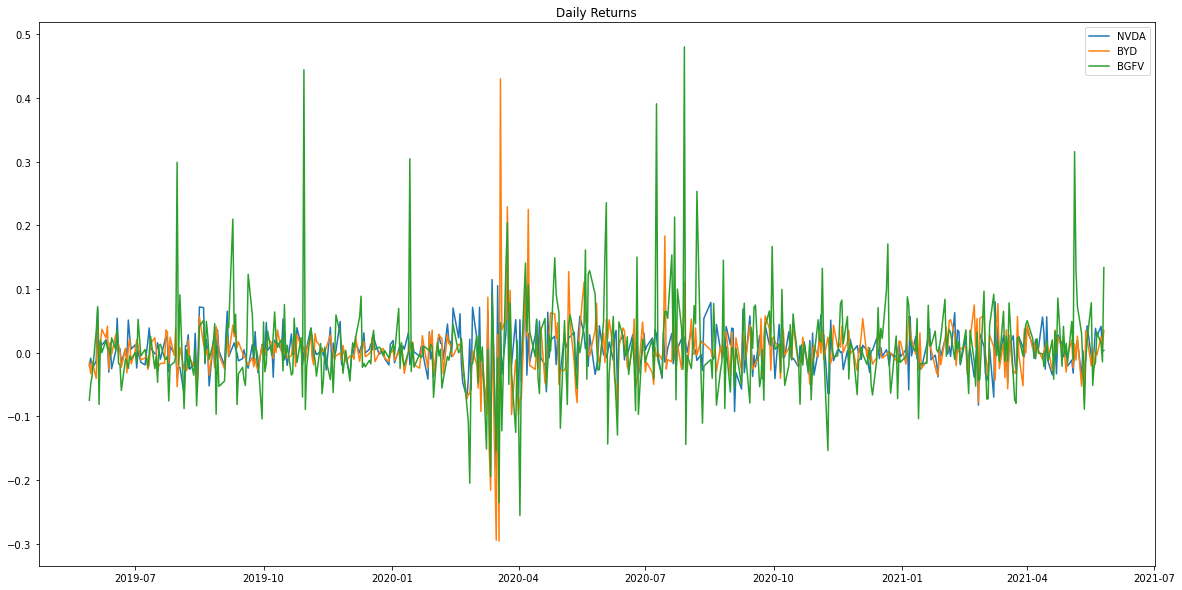

In [33]:
## Plot daily returns of all portfolios
df_daily_returns.plot(figsize=(20, 10), title="Daily Returns")

# Calculate and Plot cumulative returns

<AxesSubplot:title={'center':'Cumulative Returns'}>

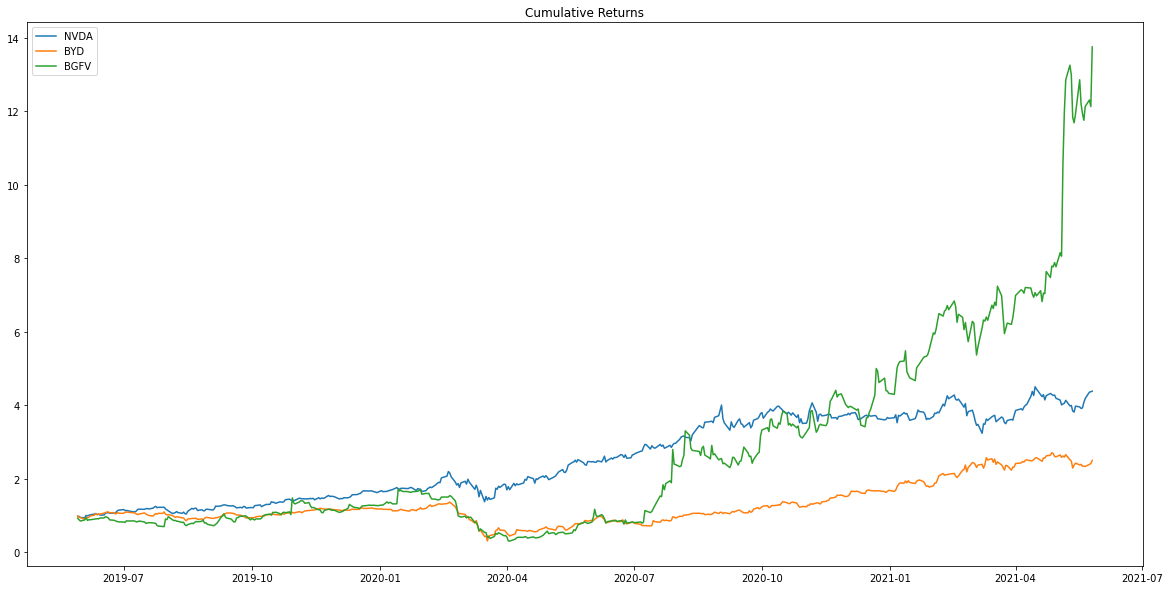

In [34]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + df_daily_returns).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Returns")

In [35]:
# Set the ticker
ticker = ["NVDA","BYD", "BGFV"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 3 years from Today
start_date = pd.Timestamp("2021-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-26", tz="America/New_York").isoformat()

# Get  years worth of historical data for NVDA, BYD, BGFV
ticker_data_2 = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df


ticker_data.head()

BGFV                                  BYD         \
                            open  high     low   close  volume   open   high   
time                                                                           
2019-05-28 00:00:00-04:00  2.390  2.52  2.3500  2.3600  314854  25.97  26.18   
2019-05-29 00:00:00-04:00  2.370  2.38  2.1365  2.1839  452810  25.22  25.69   
2019-05-30 00:00:00-04:00  2.150  2.19  2.0600  2.0750  349245  25.24  25.45   
2019-05-31 00:00:00-04:00  2.005  2.02  2.0000  2.0000   12923  23.70  24.36   
2019-06-03 00:00:00-04:00  2.020  2.19  2.0100  2.0700  263623  23.84  23.98   

                                                      NVDA                    \
                              low   close   volume    open      high     low   
time                                                                           
2019-05-28 00:00:00-04:00  25.475  25.490   555704  145.86  147.1800  143.25   
2019-05-29 00:00:00-04:00  24.950  25.080  1274203  141.41  142.8200  138.94   
2019-05-30 00:00:00-04:00  24.070  24.250  1574357  140.31  141.7499  137.57   
2019-05-31 00:00:00-04:00  23.650  23.925  1747455  137.14  139.8548  135.39   
2019-06-03 00:00:00-04:00  22.750  22.960  2443415  135.91  137.4700  132.60   

                                             
                            close    volume  
time                                         
2019-05-28 00:00:00-04:00  143.30   9185563  
2019-05-29 00:00:00-04:00  140.31  13056864  
2019-05-30 00:00:00-04:00  139.11   9231333  
2019-05-31 00:00:00-04:00  135.46   8923463  
2019-06-03 00:00:00-04:00  133.78  10726924

In [37]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_Stocks_2= MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252*3
)
MC_Stocks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.981146,1.005444,1.009089,1.037335,0.956653,0.996635,1.086425,0.974081,1.008538,1.013752,...,1.005609,0.936044,0.987015,0.983637,0.972915,1.051522,1.022916,0.982959,0.971270,1.031589
2,0.945944,1.018009,1.010262,1.075075,0.973450,1.034637,1.083783,0.989095,1.027710,1.034328,...,0.978240,0.928627,1.027960,0.930312,0.980642,1.057660,1.029099,0.956682,0.990950,1.023584
3,0.917213,1.015217,0.981781,1.078513,1.021457,1.022098,1.119104,1.009134,1.036148,1.039018,...,0.942891,0.923949,1.031332,0.934916,0.987348,1.062597,1.030125,0.992385,1.010198,1.033119
4,0.886249,0.956922,1.002440,1.086699,1.017120,1.017787,1.098469,0.995898,1.056499,1.024661,...,0.941015,0.893471,1.026091,0.941926,1.035650,1.122309,1.105211,0.995167,1.007368,0.988365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,34.273079,10.131284,27.083676,14.988770,32.763583,31.367798,36.812230,53.508637,32.426387,39.298002,...,40.637780,37.023202,23.824652,20.254037,28.104155,9.199604,16.764447,14.838073,33.761021,11.100455
753,32.886742,9.371899,27.552309,15.268419,32.725920,30.416467,37.662395,53.974784,32.196194,38.275984,...,40.913819,38.115921,24.308571,21.069401,26.996782,9.401426,17.037272,14.742736,32.679871,11.144233
754,32.359898,9.203960,28.280266,15.022315,31.055617,29.543425,36.893577,53.638819,32.025710,40.095336,...,40.503095,39.094069,26.219554,20.756501,26.533170,9.417203,17.142541,15.378204,32.609698,11.281804
755,31.718996,9.262661,27.870071,15.454882,30.321584,29.813791,36.875646,54.702890,34.262158,40.758866,...,40.619250,39.137071,25.356032,21.041414,26.578523,9.789788,17.025960,15.526568,33.058048,11.066279


In [38]:
simulated_returns_data_2 = {
    "mean": list(MC_Stocks.simulated_return.mean(axis=1)),
    "median": list(MC_Stocks.simulated_return.median(axis=1)),
    "min": list(MC_Stocks.simulated_return.min(axis=1)),
    "max": list(MC_Stocks.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.004734,1.005292,0.906958,1.097107
2,1.009196,1.009486,0.867162,1.172118
3,1.013892,1.013148,0.863573,1.206462
4,1.019137,1.020111,0.837485,1.235393


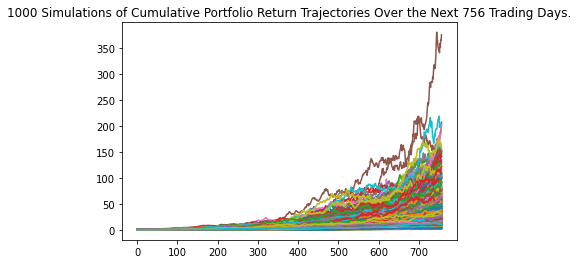

In [39]:
# Plot simulation outcomes
line_plot_2 = MC_Stocks.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_Stocks_sim_plot.png", bbox_inches="tight")

In [40]:
# Best vs S&P 500 
# Set the ticker
ticker = ["SPY", "BGFV"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 3 years from Today
start_date = pd.Timestamp("2019-05-25", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-26", tz="America/New_York").isoformat()

# Get  years worth of historical data for NVDA, BYD, BGFV
ticker_data_3 = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df


ticker_data.head()

BGFV                                  BYD         \
                            open  high     low   close  volume   open   high   
time                                                                           
2019-05-28 00:00:00-04:00  2.390  2.52  2.3500  2.3600  314854  25.97  26.18   
2019-05-29 00:00:00-04:00  2.370  2.38  2.1365  2.1839  452810  25.22  25.69   
2019-05-30 00:00:00-04:00  2.150  2.19  2.0600  2.0750  349245  25.24  25.45   
2019-05-31 00:00:00-04:00  2.005  2.02  2.0000  2.0000   12923  23.70  24.36   
2019-06-03 00:00:00-04:00  2.020  2.19  2.0100  2.0700  263623  23.84  23.98   

                                                      NVDA                    \
                              low   close   volume    open      high     low   
time                                                                           
2019-05-28 00:00:00-04:00  25.475  25.490   555704  145.86  147.1800  143.25   
2019-05-29 00:00:00-04:00  24.950  25.080  1274203  141.41  142.8200  138.94   
2019-05-30 00:00:00-04:00  24.070  24.250  1574357  140.31  141.7499  137.57   
2019-05-31 00:00:00-04:00  23.650  23.925  1747455  137.14  139.8548  135.39   
2019-06-03 00:00:00-04:00  22.750  22.960  2443415  135.91  137.4700  132.60   

                                             
                            close    volume  
time                                         
2019-05-28 00:00:00-04:00  143.30   9185563  
2019-05-29 00:00:00-04:00  140.31  13056864  
2019-05-30 00:00:00-04:00  139.11   9231333  
2019-05-31 00:00:00-04:00  135.46   8923463  
2019-06-03 00:00:00-04:00  133.78  10726924